1\. **PCA on 3D dataset**

* Generate a dataset simulating 3 features, each with N entries (N being ${\cal O}(1000)$). Each feature is made by random numbers generated according the normal distribution $N(\mu,\sigma)$ with mean $\mu_i$ and standard deviation $\sigma_i$, with $i=1, 2, 3$. Generate the 3 variables $x_{i}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues using the eigendecomposition of the covariance matrix
* Find the eigenvectors and eigenvalues using the SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained
* Redefine the data according to the new basis from the PCA
* Plot the data, in both the original and the new basis. The figure should have 2 rows (the original and the new basis) and 3 columns (the $[x_0, x_1]$, $[x_0, x_2]$ and $[x_1, x_2]$ projections) of scatter plots.

Eigendecomposition:
 [2.87804605e+01 1.94860138e+00 2.16532285e-15]
SVD:
 [2.87863458e+01 1.95604344e+00 3.39568671e-30]




Eigendecomposition:
 [[-0.11085134  0.56660861 -0.81649658]
 [-0.58309964 -0.70237322 -0.40824829]
 [-0.80480233  0.43084399  0.40824829]]
SVD:
 [[-0.1109911   0.56658125 -0.81649658]
 [-0.58292638 -0.70251702 -0.40824829]
 [-0.80490857  0.43064547  0.40824829]]

Percent of the total dataset variability explained by the first two components:  1.0


(-10.0, 10.0, -10.0, 10.0)

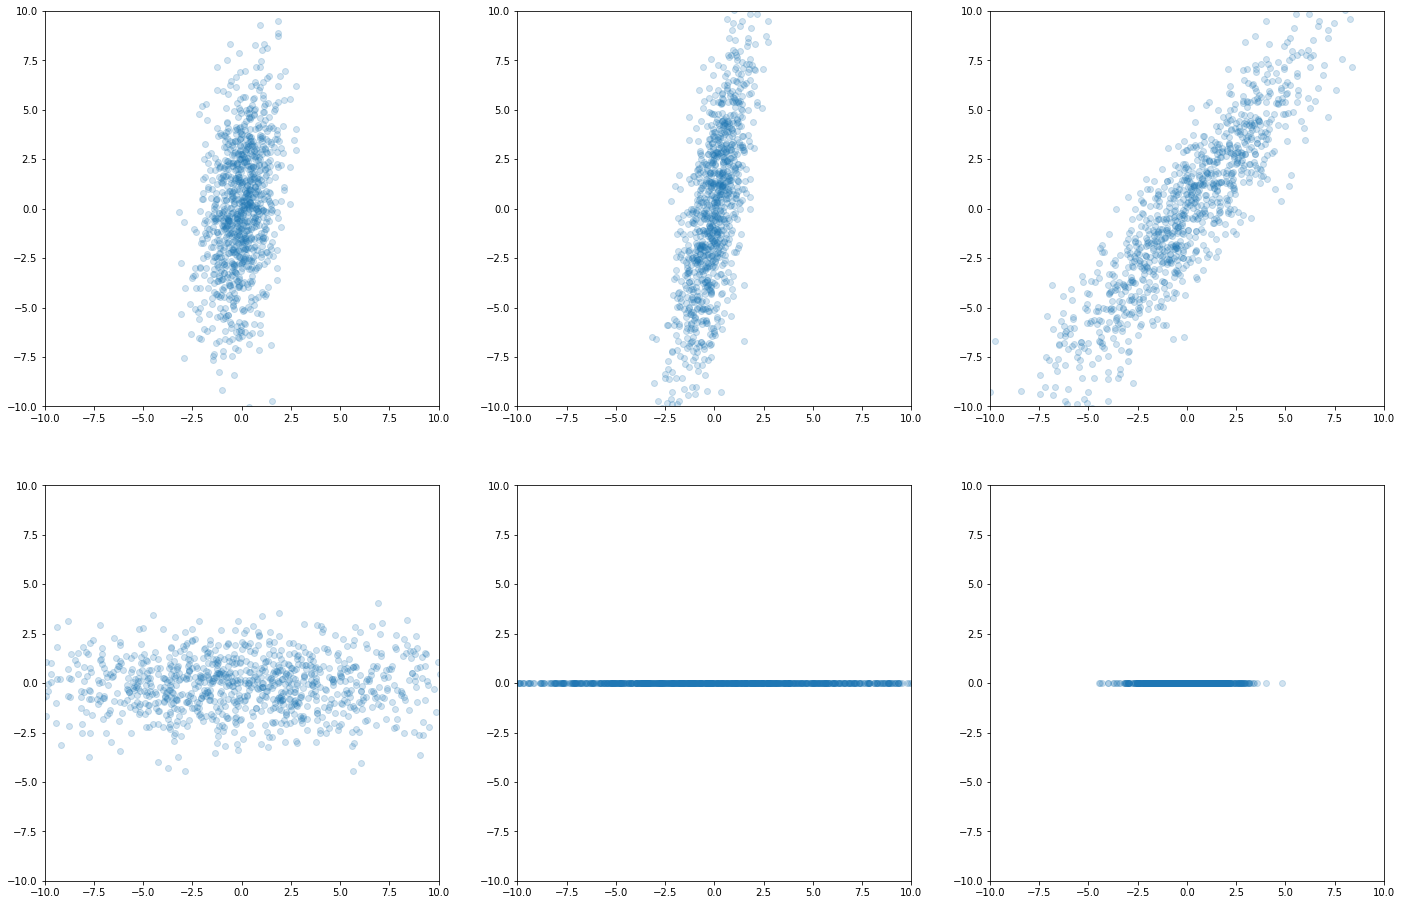

In [28]:
import numpy as np
import numpy.random as npr
from scipy import linalg as la
from matplotlib import pyplot as plt


# Setting the number of entries N for each features
N=1000

# Setting mean and std for the three features
mu1 = 0
sigma1 = 1
mu2 = 0
sigma2 = 3

# Generating the three datasets
x1 = npr.normal(mu1,sigma1,size=N)
x2 = x1 + npr.normal(mu2,sigma2,size=N)
x3 = 2 * x1 + x2 

# Stacking together the variables in a matrix X
X = np.stack([x1,x2,x3])

#Computing covariant matrix and find eigenvalues/eigenvectors using 
#covariance matrix
np_cov = np.cov(X) 
l, V = la.eig(np_cov)
l = np.real_if_close(l)
l = -np.sort(-l)
V[:, [2, 1]] = V[:, [1, 2]]


# Compute eigenvalues/eigenvectors using SVD
U, S, Vt = np.linalg.svd(X)
# Rescale the SVD spectrum to get the eigenvalues
l_svd = S**2 / (N-1)
# The matrix U already contains the eigenvectors
V_svd = U


# Compare Eigenvalues
print("Eigendecomposition:\n", l)
print("SVD:\n", l_svd)

#!!!!!! HERE THERE IS A MISMATCH BETWEEN THE TWO METHODS !!!!!

print('\n\n\n')

# Compare Eigenvectors
print("Eigendecomposition:\n", V)
print("SVD:\n", V_svd)

#!!! I AM USING THE RESULTS FROM SVD METHOD !!!

# See the loss (%) in variability in eliminating the last eigenvector
print("""\nPercent of the total dataset variability explained by the first two components: """,
      l_svd[0:2].sum()/l_svd.sum())

#print(V, '\n', U)

# Retain only the first and the second components, since the loss of 
#variability is not significant: define new matrix

NX = np.delete(X, 2, 0)

# plot the dataset
#plt.figure(figsize=(8, 8))
#plt.scatter(NX[0,:], NX[1,:], alpha=0.2)

# rotate the dataset accordingly to the new base
Xp = np.dot(V_svd.T, X)

# then plot the rotated dataset and its "axes"
fig, axes = plt.subplots(2,3,figsize=(24, 16))

# Plot in the original basis
axes[0, 0].scatter(X[0,:], X[1,:], alpha=0.2)
axes[0, 0].axis([-10,10,-10,10])
axes[0, 1].scatter(X[0,:], X[2,:], alpha=0.2)
axes[0, 1].axis([-10,10,-10,10])
axes[0, 2].scatter(X[1,:], X[2,:], alpha=0.2)
axes[0, 2].axis([-10,10,-10,10])


# Plot in the rotated basis
axes[1, 0].scatter(Xp[0,:], Xp[1,:], alpha=0.2)
axes[1, 0].axis([-10,10,-10,10])
axes[1, 1].scatter(Xp[0,:], Xp[2,:], alpha=0.2)
axes[1, 1].axis([-10,10,-10,10])
axes[1, 2].scatter(Xp[1,:], Xp[2,:], alpha=0.2)
axes[1, 2].axis([-10,10,-10,10])


2\. **PCA on a nD dataset**

* Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normally distributed, with a standard deviation much smaller (e.g. a factor 20) than those used to generate the $x_1$ and $x_2$. Repeat the PCA procedure and compare the results with what you have obtained before.

eigenvalues:
 [2.87863537e+01 1.95605039e+00 2.22452516e-03 1.94065887e-03
 1.38911306e-03 1.06220682e-03 4.30543714e-04 2.73437676e-04
 1.14967774e-04 7.22320328e-05 1.47092666e-05 2.62963381e-06
 4.94406712e-31]

Percent of the total dataset variability explained by the first two components:  0.9997552832078682


(-15.0, 15.0, -15.0, 15.0)

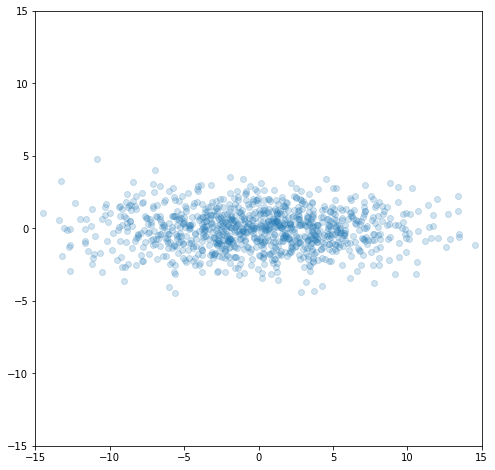

In [50]:
# define means and stds for the random noise variables 
m = np.zeros(10)
s = npr.rand(10)*0.05

# Generate and add the random noise
noise = [npr.normal(m[i], s[i],size=N) for i in range(10)]
noise = np.vstack(noise)
Xn = np.vstack((noise, x1, x2, x3))

# Compute eigenvalues/eigenvectors of Xn using SVD
Un, Sn, Vnt = np.linalg.svd(Xn)
# Rescale the SVD spectrum to get the eigenvalues
ln = Sn**2 / (N-1)
# The matrix Un already contains the eigenvectors
Vn = Un

# Eigenvector and eigenvaluse
#print("Eigenvectors: \n", Vn)
print("eigenvalues:\n", ln)

# See the loss (%) in variability in retaining only the first two components
print("""\nPercent of the total dataset variability explained by the first two components: """,
      ln[0:2].sum()/ln.sum())

# rotate the dataset accordingly to the new base
Xnp = np.dot(Vn.T, Xn)

# plot the dataset
plt.figure(figsize=(8, 8))
plt.scatter(Xnp[0,:], Xnp[1,:], alpha=0.2)
plt.axis([-15,15,-15,15])


3\. **Optional**: **PCA on the MAGIC dataset**

Perform a PCA on the magic04.data dataset.

In [61]:
# get the dataset and its description on the proper data directory
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data -P data/
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names -P data/ 

In [48]:
import pandas as pd

# Put the content of the file inside a pandas Dataframe 
#(I used the indices as was done in lecture 06)
file_name = "data/magic04.data"
data = pd.read_csv(file_name, nrows=1000, names=['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 'fM3Long', 'fM3Trans', 'fAlpha', 'fDist', 'category'])
data

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,category
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g
...,...,...,...,...,...,...,...,...,...,...,...
995,20.0489,9.2926,2.4014,0.6429,0.4226,4.1464,-14.5626,10.2506,25.8830,187.8470,g
996,13.3396,10.5628,2.1917,0.7910,0.4019,-14.8910,-2.3901,11.9001,10.7959,182.9100,g
997,49.8521,11.4525,2.3971,0.4529,0.2305,52.6071,39.3622,-8.6905,6.0457,183.4950,g
998,29.2688,14.2779,2.5723,0.4016,0.2021,-21.2132,-23.9344,-8.2073,47.5590,102.7790,g


eigenvalues:
 [4.42270348e+04 1.68262392e+03 1.08492660e+03 4.99899584e+02
 3.07129292e+02 1.84288803e+02 3.83375720e+01 3.57653861e-01
 1.99454462e-02 3.99875051e-04]

Percent of the total dataset variability explained by the first three components:  0.9785519743626081


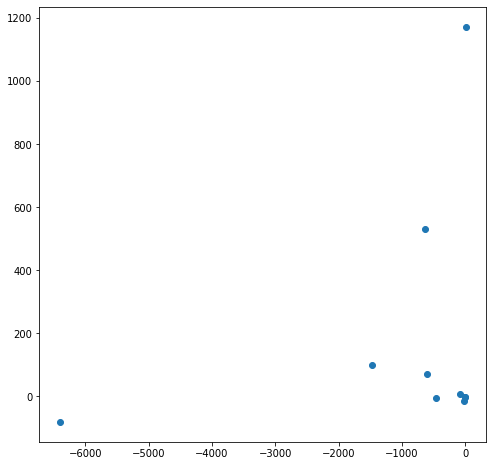

In [49]:
# Convert pandas Dataframe into a numpy array
data = data.iloc[:, :-1]
DATA = data.to_numpy()

# Compute eigenvalues/eigenvectors of DATA using SVD
Ud, Sd, Vdt = np.linalg.svd(DATA)
# Rescale the SVD spectrum to get the eigenvalues
ld = Sd**2 / (len(DATA)-1)
# The matrix Un already contains the eigenvectors
Vd = Ud

# Eigenvector and eigenvaluse
#print("Eigenvectors: \n", Vd)
print("eigenvalues:\n", ld)

# See the loss (%) in variability in retaining only the first three components
print("""\nPercent of the total dataset variability explained by the first three components: """,
      ld[0:3].sum()/ld.sum())


# rotate the dataset accordingly to the new base
Xdp = np.dot(Vd.T, DATA)

# plot the dataset, just the first two components
plt.figure(figsize=(8, 8))
plt.scatter(Xdp[0,:], Xdp[1,:], alpha=1)
#plt.axis([-15,15,-15,15])